In [43]:
import numpy as np
import pandas as pd
import math 
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', 10)

In [49]:
data = pd.read_csv('cricket.csv')
data.head()

,Match,Date,Innings,Over,Runs,Total.Runs,Innings.Total.Runs,Runs.Remaining,Total.Out,Innings.Total.Out,Outs.Remaining,Wickets.in.Hand,Run.Rate,Innings.Run.Rate,Run.Rate.Required,Initial.Run.Rate.Required,Target.Score,Day-night,At.Bat,Fielding,Home.Team,Away.Team,Stadium,Country,Total.Overs,Winning.Team,Toss.Winner,at.bat.wins,at.bat.won.toss,at.bat.at.home,at.bat.bat.first,chose_bat_1st,chose_bat_2nd,forced_bat_1st,forced_bat_2nd,new.game,Error.In.Data,common.support
0,65193,14/05/1999,1,1,4,4,204,200,0,10,10,10,4.0,4.08,-1.0,-1.0,-1,0,Sri Lanka,England,England,Sri Lanka,Lord's,England,50,England,England,0,0,0,1,0,0,1,0,1,0,1
1,65193,14/05/1999,1,2,2,6,204,198,0,10,10,10,3.0,4.08,-1.0,-1.0,-1,0,Sri Lanka,England,England,Sri Lanka,Lord's,England,50,England,England,0,0,0,1,0,0,1,0,0,0,1
2,65193,14/05/1999,1,3,3,9,204,195,0,10,10,10,3.0,4.08,-1.0,-1.0,-1,0,Sri Lanka,England,England,Sri Lanka,Lord's,England,50,England,England,0,0,0,1,0,0,1,0,0,0,1
3,65193,14/05/1999,1,4,2,20,204,184,0,10,10,10,5.0,4.08,-1.0,-1.0,-1,0,Sri Lanka,England,England,Sri Lanka,Lord's,England,50,England,England,0,0,0,1,0,0,1,0,0,0,1
4,65193,14/05/1999,1,5,6,37,204,167,0,10,10,10,7.4,4.08,-1.0,-1.0,-1,0,Sri Lanka,England,England,Sri Lanka,Lord's,England,50,England,England,0,0,0,1,0,0,1,0,0,0,1


In [50]:
data.shape

(126768, 38)

In [51]:
original = data.copy()

In [28]:
data.Match.nunique()

1423

<AxesSubplot:>

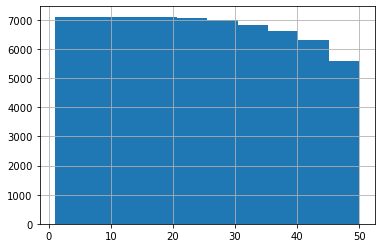

In [29]:
data_first.Over.hist()

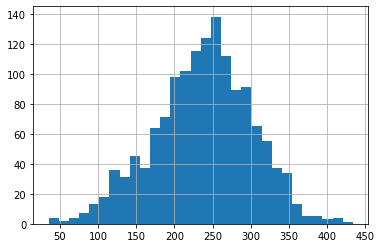

In [46]:
total_runs_per_match = data_first.groupby('Match').first()
total_runs_per_match['Innings.Total.Runs'].hist(bins = 30)
# ax = sns.kdeplot(data=total_runs_per_match, x="Innings.Total.Runs", shade = True)
plt.show()

In [27]:
data.dtypes

Match              int64
Date              object
Innings            int64
Over               int64
Runs               int64
                   ...  
forced_bat_1st     int64
forced_bat_2nd     int64
new.game           int64
Error.In.Data      int64
common.support     int64
Length: 38, dtype: object

In [15]:
match = data[data.Match == 65193]
match[match.Innings == 1]

,Match,Date,Innings,Over,Runs,Total.Runs,Innings.Total.Runs,Runs.Remaining,Total.Out,Innings.Total.Out,Outs.Remaining,Wickets.in.Hand,Run.Rate,Innings.Run.Rate,Run.Rate.Required,Initial.Run.Rate.Required,Target.Score,Day-night,At.Bat,Fielding,Home.Team,Away.Team,Stadium,Country,Total.Overs,Winning.Team,Toss.Winner,at.bat.wins,at.bat.won.toss,at.bat.at.home,at.bat.bat.first,chose_bat_1st,chose_bat_2nd,forced_bat_1st,forced_bat_2nd,new.game,Error.In.Data,common.support
0,65193,14/05/1999,1,1,4,4,204,200,0,10,10,10,4.000000,4.08,-1.0,-1.0,-1,0,Sri Lanka,England,England,Sri Lanka,Lord's,England,50,England,England,0,0,0,1,0,0,1,0,1,0,1
1,65193,14/05/1999,1,2,2,6,204,198,0,10,10,10,3.000000,4.08,-1.0,-1.0,-1,0,Sri Lanka,England,England,Sri Lanka,Lord's,England,50,England,England,0,0,0,1,0,0,1,0,0,0,1
2,65193,14/05/1999,1,3,3,9,204,195,0,10,10,10,3.000000,4.08,-1.0,-1.0,-1,0,Sri Lanka,England,England,Sri Lanka,Lord's,England,50,England,England,0,0,0,1,0,0,1,0,0,0,1
3,65193,14/05/1999,1,4,2,20,204,184,0,10,10,10,5.000000,4.08,-1.0,-1.0,-1,0,Sri Lanka,England,England,Sri Lanka,Lord's,England,50,England,England,0,0,0,1,0,0,1,0,0,0,1
4,65193,14/05/1999,1,5,6,37,204,167,0,10,10,10,7.400000,4.08,-1.0,-1.0,-1,0,Sri Lanka,England,England,Sri Lanka,Lord's,England,50,England,England,0,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40,65193,14/05/1999,1,41,2,177,204,27,8,10,2,2,4.317073,4.08,-1.0,-1.0,-1,0,Sri Lanka,England,England,Sri Lanka,Lord's,England,50,England,England,0,0,0,1,0,0,1,0,0,0,1
41,65193,14/05/1999,1,42,7,184,204,20,8,10,2,2,4.380952,4.08,-1.0,-1.0,-1,0,Sri Lanka,England,England,Sri Lanka,Lord's,England,50,England,England,0,0,0,1,0,0,1,0,0,0,1
42,65193,14/05/1999,1,43,6,190,204,14,8,10,2,2,4.418605,4.08,-1.0,-1.0,-1,0,Sri Lanka,England,England,Sri Lanka,Lord's,England,50,England,England,0,0,0,1,0,0,1,0,0,0,1
43,65193,14/05/1999,1,44,3,193,204,11,9,10,1,1,4.386364,4.08,-1.0,-1.0,-1,0,Sri Lanka,England,England,Sri Lanka,Lord's,England,50,England,England,0,0,0,1,0,0,1,0,0,0,1


In [12]:
data_first = data[data.Innings == 1].copy()
data_first

,Match,Date,Innings,Over,Runs,Total.Runs,Innings.Total.Runs,Runs.Remaining,Total.Out,Innings.Total.Out,Outs.Remaining,Wickets.in.Hand,Run.Rate,Innings.Run.Rate,Run.Rate.Required,Initial.Run.Rate.Required,Target.Score,Day-night,At.Bat,Fielding,Home.Team,Away.Team,Stadium,Country,Total.Overs,Winning.Team,Toss.Winner,at.bat.wins,at.bat.won.toss,at.bat.at.home,at.bat.bat.first,chose_bat_1st,chose_bat_2nd,forced_bat_1st,forced_bat_2nd,new.game,Error.In.Data,common.support
0,65193,14/05/1999,1,1,4,4,204,200,0,10,10,10,4.000000,4.08,-1.0,-1.0,-1,0,Sri Lanka,England,England,Sri Lanka,Lord's,England,50,England,England,0,0,0,1,0,0,1,0,1,0,1
1,65193,14/05/1999,1,2,2,6,204,198,0,10,10,10,3.000000,4.08,-1.0,-1.0,-1,0,Sri Lanka,England,England,Sri Lanka,Lord's,England,50,England,England,0,0,0,1,0,0,1,0,0,0,1
2,65193,14/05/1999,1,3,3,9,204,195,0,10,10,10,3.000000,4.08,-1.0,-1.0,-1,0,Sri Lanka,England,England,Sri Lanka,Lord's,England,50,England,England,0,0,0,1,0,0,1,0,0,0,1
3,65193,14/05/1999,1,4,2,20,204,184,0,10,10,10,5.000000,4.08,-1.0,-1.0,-1,0,Sri Lanka,England,England,Sri Lanka,Lord's,England,50,England,England,0,0,0,1,0,0,1,0,0,0,1
4,65193,14/05/1999,1,5,6,37,204,167,0,10,10,10,7.400000,4.08,-1.0,-1.0,-1,0,Sri Lanka,England,England,Sri Lanka,Lord's,England,50,England,England,0,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126719,536933,11/12/2011,1,46,3,244,267,23,4,6,2,6,5.304348,5.34,-1.0,-1.0,-1,1,India,West Indies,India,West Indies,Chennai,India,50,India,India,1,1,1,1,1,0,0,0,0,0,1
126720,536933,11/12/2011,1,47,6,250,267,17,5,6,1,5,5.319149,5.34,-1.0,-1.0,-1,1,India,West Indies,India,West Indies,Chennai,India,50,India,India,1,1,1,1,1,0,0,0,0,0,1
126721,536933,11/12/2011,1,48,8,258,267,9,5,6,1,5,5.375000,5.34,-1.0,-1.0,-1,1,India,West Indies,India,West Indies,Chennai,India,50,India,India,1,1,1,1,1,0,0,0,0,0,1
126722,536933,11/12/2011,1,49,0,258,267,9,5,6,1,5,5.265306,5.34,-1.0,-1.0,-1,1,India,West Indies,India,West Indies,Chennai,India,50,India,India,1,1,1,1,1,0,0,0,0,0,1


In [16]:
data_10 = data_first.groupby('Match').first()

In [18]:
data_10[data_10.Over != 1]

,Date,Innings,Over,Runs,Total.Runs,Innings.Total.Runs,Runs.Remaining,Total.Out,Innings.Total.Out,Outs.Remaining,Wickets.in.Hand,Run.Rate,Innings.Run.Rate,Run.Rate.Required,Initial.Run.Rate.Required,Target.Score,Day-night,At.Bat,Fielding,Home.Team,Away.Team,Stadium,Country,Total.Overs,Winning.Team,Toss.Winner,at.bat.wins,at.bat.won.toss,at.bat.at.home,at.bat.bat.first,chose_bat_1st,chose_bat_2nd,forced_bat_1st,forced_bat_2nd,new.game,Error.In.Data,common.support
Match,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
410557,12/07/2009,1,16,3,85,256,171,3,7,4,7,5.3125,5.12,-1.0,-1.0,-1,0,Ireland,Kenya,Ireland,Kenya,Dublin,Ireland,50,Ireland,Kenya,1,0,1,1,0,0,1,0,1,0,0


In [22]:
temp = data[data.Match == 410557]
temp = temp[temp.Innings == 1]
temp.Over.tolist()

[16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50]

In [67]:
matches_with_error_in_data = data[data['Error.In.Data'] != 0].Match.unique()
matches_with_error_in_data

array([], dtype=int64)

In [68]:
# dropping those matches with 1 in error.in.data column
data = data[~(data.Match.isin(matches_with_error_in_data))]
data

,Match,Date,Innings,Over,Runs,Total.Runs,Innings.Total.Runs,Runs.Remaining,Total.Out,Innings.Total.Out,Outs.Remaining,Wickets.in.Hand,Run.Rate,Innings.Run.Rate,Run.Rate.Required,Initial.Run.Rate.Required,Target.Score,Day-night,At.Bat,Fielding,Home.Team,Away.Team,Stadium,Country,Total.Overs,Winning.Team,Toss.Winner,at.bat.wins,at.bat.won.toss,at.bat.at.home,at.bat.bat.first,chose_bat_1st,chose_bat_2nd,forced_bat_1st,forced_bat_2nd,new.game,Error.In.Data,common.support
0,65193,14/05/1999,1,1,4,4,204,200,0,10,10,10,4.000000,4.08,-1.000000,-1.00,-1,0,Sri Lanka,England,England,Sri Lanka,Lord's,England,50,England,England,0,0,0,1,0,0,1,0,1,0,1
1,65193,14/05/1999,1,2,2,6,204,198,0,10,10,10,3.000000,4.08,-1.000000,-1.00,-1,0,Sri Lanka,England,England,Sri Lanka,Lord's,England,50,England,England,0,0,0,1,0,0,1,0,0,0,1
2,65193,14/05/1999,1,3,3,9,204,195,0,10,10,10,3.000000,4.08,-1.000000,-1.00,-1,0,Sri Lanka,England,England,Sri Lanka,Lord's,England,50,England,England,0,0,0,1,0,0,1,0,0,0,1
3,65193,14/05/1999,1,4,2,20,204,184,0,10,10,10,5.000000,4.08,-1.000000,-1.00,-1,0,Sri Lanka,England,England,Sri Lanka,Lord's,England,50,England,England,0,0,0,1,0,0,1,0,0,0,1
4,65193,14/05/1999,1,5,6,37,204,167,0,10,10,10,7.400000,4.08,-1.000000,-1.00,-1,0,Sri Lanka,England,England,Sri Lanka,Lord's,England,50,England,England,0,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126763,536933,11/12/2011,2,40,13,211,233,22,8,10,2,2,5.275000,4.66,5.700000,5.36,268,1,West Indies,India,India,West Indies,Chennai,India,50,India,India,0,0,0,0,0,0,0,1,0,0,1
126764,536933,11/12/2011,2,41,1,212,233,21,8,10,2,2,5.170732,4.66,6.222222,5.36,268,1,West Indies,India,India,West Indies,Chennai,India,50,India,India,0,0,0,0,0,0,0,1,0,0,1
126765,536933,11/12/2011,2,42,1,213,233,20,9,10,1,1,5.071429,4.66,6.875000,5.36,268,1,West Indies,India,India,West Indies,Chennai,India,50,India,India,0,0,0,0,0,0,0,1,0,0,1
126766,536933,11/12/2011,2,43,11,224,233,9,9,10,1,1,5.209302,4.66,6.285714,5.36,268,1,West Indies,India,India,West Indies,Chennai,India,50,India,India,0,0,0,0,0,0,0,1,0,0,1


In [57]:
print(original.Match.nunique())
print(data.Match.nunique())

1423
1412


In [59]:
data_first = data[data.Innings == 1].copy()

In [60]:
print(data.shape)
print(data_first.shape)

(125838, 38)
(67288, 38)


In [65]:
# Matches for which Total.Runs != Innings.Total.Runs
last_over = data_first.groupby('Match').last()
last_over[last_over['Total.Runs'] != last_over['Innings.Total.Runs']]

,Date,Innings,Over,Runs,Total.Runs,Innings.Total.Runs,Runs.Remaining,Total.Out,Innings.Total.Out,Outs.Remaining,Wickets.in.Hand,Run.Rate,Innings.Run.Rate,Run.Rate.Required,Initial.Run.Rate.Required,Target.Score,Day-night,At.Bat,Fielding,Home.Team,Away.Team,Stadium,Country,Total.Overs,Winning.Team,Toss.Winner,at.bat.wins,at.bat.won.toss,at.bat.at.home,at.bat.bat.first,chose_bat_1st,chose_bat_2nd,forced_bat_1st,forced_bat_2nd,new.game,Error.In.Data,common.support
Match,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
64940,9/04/2005,1,50,3,310,319,9,7,9,2,3,6.200000,6.38,-1.0,-1.0,-1,0,Pakistan,India,India,Pakistan,Jamshedpur,India,50,Pakistan,Pakistan,1,1,0,1,1,0,0,0,0,0,1
66321,22/07/2001,1,50,9,220,221,1,9,9,0,1,4.400000,4.42,-1.0,-1.0,-1,1,Sri Lanka,India,Sri Lanka,India,Colombo (RPS),Sri Lanka,50,Sri Lanka,Sri Lanka,1,1,1,1,1,0,0,0,0,0,1
385023,27/01/2009,1,50,4,305,306,1,7,7,0,3,6.100000,6.12,-1.0,-1.0,-1,0,Zimbabwe,Kenya,Kenya,Zimbabwe,Mombasa,Kenya,50,Zimbabwe,Zimbabwe,1,1,0,1,1,0,0,0,0,0,1
408627,22/08/2009,1,50,3,204,205,1,9,9,0,1,4.080000,4.10,-1.0,-1.0,-1,0,Ireland,Scotland,Scotland,Ireland,Aberdeen,Scotland,50,Ireland,Scotland,1,0,0,1,0,0,1,0,0,0,0
424849,12/10/2009,1,33,11,153,313,160,1,4,3,9,4.636364,6.26,-1.0,-1.0,-1,0,Zimbabwe,Kenya,Zimbabwe,Kenya,Harare,Zimbabwe,50,Zimbabwe,Zimbabwe,1,1,1,1,1,0,0,0,0,0,1
450372,1/07/2010,1,50,19,233,234,1,6,6,0,4,4.660000,4.68,-1.0,-1.0,-1,0,Netherlands,Scotland,Netherlands,Scotland,Amstelveen,Netherlands,50,Scotland,Netherlands,0,1,1,1,1,0,0,0,0,0,0
464717,16/08/2010,1,50,5,272,275,3,6,6,0,4,5.440000,5.50,-1.0,-1.0,-1,0,Ireland,Netherlands,Ireland,Netherlands,Dublin,Ireland,50,Ireland,Netherlands,1,0,1,1,0,0,1,0,0,0,0
506207,12/07/2011,1,50,6,318,320,2,8,8,0,2,6.360000,6.40,-1.0,-1.0,-1,0,Ireland,Scotland,Scotland,Ireland,Edinburgh,Scotland,50,Scotland,Scotland,0,0,0,1,0,0,1,0,0,0,0


In [66]:
matches_total_runs_error = last_over[last_over['Total.Runs'] != last_over['Innings.Total.Runs']].index.tolist()
matches_total_runs_error

[64940, 66321, 385023, 408627, 424849, 450372, 464717, 506207]

In [69]:
data.Innings.value_counts()

1    67288
2    58550
Name: Innings, dtype: int64

In [71]:
data_first = data[data.Innings == 1]
data_second = data[data.Innings == 2]
data_second

,Match,Date,Innings,Over,Runs,Total.Runs,Innings.Total.Runs,Runs.Remaining,Total.Out,Innings.Total.Out,Outs.Remaining,Wickets.in.Hand,Run.Rate,Innings.Run.Rate,Run.Rate.Required,Initial.Run.Rate.Required,Target.Score,Day-night,At.Bat,Fielding,Home.Team,Away.Team,Stadium,Country,Total.Overs,Winning.Team,Toss.Winner,at.bat.wins,at.bat.won.toss,at.bat.at.home,at.bat.bat.first,chose_bat_1st,chose_bat_2nd,forced_bat_1st,forced_bat_2nd,new.game,Error.In.Data,common.support
45,65193,14/05/1999,2,1,1,1,207,206,0,2,2,10,1.000000,4.14,4.163265,4.10,205,0,England,Sri Lanka,England,Sri Lanka,Lord's,England,50,England,England,1,1,1,0,0,1,0,0,0,0,1
46,65193,14/05/1999,2,2,7,8,207,199,0,2,2,10,4.000000,4.14,4.104167,4.10,205,0,England,Sri Lanka,England,Sri Lanka,Lord's,England,50,England,England,1,1,1,0,0,1,0,0,0,0,1
47,65193,14/05/1999,2,3,0,8,207,199,0,2,2,10,2.666667,4.14,4.191489,4.10,205,0,England,Sri Lanka,England,Sri Lanka,Lord's,England,50,England,England,1,1,1,0,0,1,0,0,0,0,1
48,65193,14/05/1999,2,4,1,9,207,198,0,2,2,10,2.250000,4.14,4.260870,4.10,205,0,England,Sri Lanka,England,Sri Lanka,Lord's,England,50,England,England,1,1,1,0,0,1,0,0,0,0,1
49,65193,14/05/1999,2,5,1,10,207,197,0,2,2,10,2.000000,4.14,4.333333,4.10,205,0,England,Sri Lanka,England,Sri Lanka,Lord's,England,50,England,England,1,1,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126763,536933,11/12/2011,2,40,13,211,233,22,8,10,2,2,5.275000,4.66,5.700000,5.36,268,1,West Indies,India,India,West Indies,Chennai,India,50,India,India,0,0,0,0,0,0,0,1,0,0,1
126764,536933,11/12/2011,2,41,1,212,233,21,8,10,2,2,5.170732,4.66,6.222222,5.36,268,1,West Indies,India,India,West Indies,Chennai,India,50,India,India,0,0,0,0,0,0,0,1,0,0,1
126765,536933,11/12/2011,2,42,1,213,233,20,9,10,1,1,5.071429,4.66,6.875000,5.36,268,1,West Indies,India,India,West Indies,Chennai,India,50,India,India,0,0,0,0,0,0,0,1,0,0,1
126766,536933,11/12/2011,2,43,11,224,233,9,9,10,1,1,5.209302,4.66,6.285714,5.36,268,1,West Indies,India,India,West Indies,Chennai,India,50,India,India,0,0,0,0,0,0,0,1,0,0,1


In [73]:
match_first = data_first.Match.unique()
match_second = data_second.Match.unique()
print(len(match_first))
print(len(match_second))

1412
1412


In [75]:
for m2 in match_second:
    if m2 not in match_first:
        print(m2)

In [76]:
print(data_first.shape)
print(data_second.shape)

(67288, 38)
(58550, 38)


In [78]:
print(data_first.Match.nunique())
print(data_second.Match.nunique())

1412
1412


In [80]:
print(original[original.Innings == 1].Match.nunique())
print(original[original.Innings == 2].Match.nunique())

1423
1423


In [81]:
data.Match.nunique()

1412

In [82]:
data.head()

,Match,Date,Innings,Over,Runs,Total.Runs,Innings.Total.Runs,Runs.Remaining,Total.Out,Innings.Total.Out,Outs.Remaining,Wickets.in.Hand,Run.Rate,Innings.Run.Rate,Run.Rate.Required,Initial.Run.Rate.Required,Target.Score,Day-night,At.Bat,Fielding,Home.Team,Away.Team,Stadium,Country,Total.Overs,Winning.Team,Toss.Winner,at.bat.wins,at.bat.won.toss,at.bat.at.home,at.bat.bat.first,chose_bat_1st,chose_bat_2nd,forced_bat_1st,forced_bat_2nd,new.game,Error.In.Data,common.support
0,65193,14/05/1999,1,1,4,4,204,200,0,10,10,10,4.0,4.08,-1.0,-1.0,-1,0,Sri Lanka,England,England,Sri Lanka,Lord's,England,50,England,England,0,0,0,1,0,0,1,0,1,0,1
1,65193,14/05/1999,1,2,2,6,204,198,0,10,10,10,3.0,4.08,-1.0,-1.0,-1,0,Sri Lanka,England,England,Sri Lanka,Lord's,England,50,England,England,0,0,0,1,0,0,1,0,0,0,1
2,65193,14/05/1999,1,3,3,9,204,195,0,10,10,10,3.0,4.08,-1.0,-1.0,-1,0,Sri Lanka,England,England,Sri Lanka,Lord's,England,50,England,England,0,0,0,1,0,0,1,0,0,0,1
3,65193,14/05/1999,1,4,2,20,204,184,0,10,10,10,5.0,4.08,-1.0,-1.0,-1,0,Sri Lanka,England,England,Sri Lanka,Lord's,England,50,England,England,0,0,0,1,0,0,1,0,0,0,1
4,65193,14/05/1999,1,5,6,37,204,167,0,10,10,10,7.4,4.08,-1.0,-1.0,-1,0,Sri Lanka,England,England,Sri Lanka,Lord's,England,50,England,England,0,0,0,1,0,0,1,0,0,0,1


In [92]:
# This is Z0(10)
data_first.groupby('Match').first()['Innings.Total.Runs']
data_first.groupby('Match').first()['Innings.Total.Runs'].mean()

237.4929178470255

In [88]:
# Compute Z0(9)
data_first[data_first['Wickets.in.Hand'] <= 9].groupby('Match').first()

,Date,Innings,Over,Runs,Total.Runs,Innings.Total.Runs,Runs.Remaining,Total.Out,Innings.Total.Out,Outs.Remaining,Wickets.in.Hand,Run.Rate,Innings.Run.Rate,Run.Rate.Required,Initial.Run.Rate.Required,Target.Score,Day-night,At.Bat,Fielding,Home.Team,Away.Team,Stadium,Country,Total.Overs,Winning.Team,Toss.Winner,at.bat.wins,at.bat.won.toss,at.bat.at.home,at.bat.bat.first,chose_bat_1st,chose_bat_2nd,forced_bat_1st,forced_bat_2nd,new.game,Error.In.Data,common.support
Match,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
64725,23/09/2001,1,19,4,156,363,207,1,3,2,9,8.210526,7.26,-1.0,-1.0,-1,0,South Africa,Zimbabwe,Zimbabwe,South Africa,Bulawayo,Zimbabwe,50,South Africa,South Africa,1,1,0,1,1,0,0,0,0,0,1
64726,29/09/2001,1,5,6,28,272,244,1,7,6,9,5.600000,5.44,-1.0,-1.0,-1,0,South Africa,Zimbabwe,Zimbabwe,South Africa,Harare,Zimbabwe,50,South Africa,South Africa,1,1,0,1,1,0,0,0,0,0,1
64727,30/09/2001,1,4,0,7,184,177,1,6,5,9,1.750000,3.68,-1.0,-1.0,-1,0,Zimbabwe,South Africa,Zimbabwe,South Africa,Harare,Zimbabwe,50,South Africa,Zimbabwe,0,1,1,1,1,0,0,0,0,0,1
64728,3/10/2001,1,5,1,13,206,193,1,10,9,9,2.600000,4.12,-1.0,-1.0,-1,0,Zimbabwe,England,Zimbabwe,England,Harare,Zimbabwe,50,England,Zimbabwe,0,1,1,1,1,0,0,0,0,0,1
64729,6/10/2001,1,7,3,28,195,167,1,10,9,9,4.000000,3.90,-1.0,-1.0,-1,0,Zimbabwe,England,Zimbabwe,England,Harare,Zimbabwe,50,England,Zimbabwe,0,1,1,1,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536932,8/12/2011,1,23,6,176,418,242,1,5,4,9,7.652174,8.36,-1.0,-1.0,-1,1,India,West Indies,India,West Indies,Indore,India,50,India,India,1,1,1,1,1,0,0,0,0,0,1
536933,11/12/2011,1,1,2,2,267,265,2,6,4,8,2.000000,5.34,-1.0,-1.0,-1,1,India,West Indies,India,West Indies,Chennai,India,50,India,India,1,1,1,1,1,0,0,0,1,0,1
538069,1/12/2011,1,1,0,0,91,91,1,10,9,9,0.000000,1.82,-1.0,-1.0,-1,0,Bangladesh,Pakistan,Bangladesh,Pakistan,Dhaka,India,50,Pakistan,Bangladesh,0,1,0,1,1,0,0,0,1,0,1


In [97]:
# Compute Z0(9)
data_9 = data_first[data_first['Wickets.in.Hand'] <= 9].groupby('Match').first()
data_9['Runs.Remaining'].mean()
# data_9.head()

202.07577903682719

In [95]:
# This is Z0(10)
data_10 = data_first.groupby('Match').first()['Innings.Total.Runs']
data_10.head()
# data_first.groupby('Match').first()['Innings.Total.Runs'].mean()

Match
64725    363
64726    272
64727    184
64728    206
64729    195
Name: Innings.Total.Runs, dtype: int64

In [96]:
data_first.head()

,Match,Date,Innings,Over,Runs,Total.Runs,Innings.Total.Runs,Runs.Remaining,Total.Out,Innings.Total.Out,Outs.Remaining,Wickets.in.Hand,Run.Rate,Innings.Run.Rate,Run.Rate.Required,Initial.Run.Rate.Required,Target.Score,Day-night,At.Bat,Fielding,Home.Team,Away.Team,Stadium,Country,Total.Overs,Winning.Team,Toss.Winner,at.bat.wins,at.bat.won.toss,at.bat.at.home,at.bat.bat.first,chose_bat_1st,chose_bat_2nd,forced_bat_1st,forced_bat_2nd,new.game,Error.In.Data,common.support
0,65193,14/05/1999,1,1,4,4,204,200,0,10,10,10,4.0,4.08,-1.0,-1.0,-1,0,Sri Lanka,England,England,Sri Lanka,Lord's,England,50,England,England,0,0,0,1,0,0,1,0,1,0,1
1,65193,14/05/1999,1,2,2,6,204,198,0,10,10,10,3.0,4.08,-1.0,-1.0,-1,0,Sri Lanka,England,England,Sri Lanka,Lord's,England,50,England,England,0,0,0,1,0,0,1,0,0,0,1
2,65193,14/05/1999,1,3,3,9,204,195,0,10,10,10,3.0,4.08,-1.0,-1.0,-1,0,Sri Lanka,England,England,Sri Lanka,Lord's,England,50,England,England,0,0,0,1,0,0,1,0,0,0,1
3,65193,14/05/1999,1,4,2,20,204,184,0,10,10,10,5.0,4.08,-1.0,-1.0,-1,0,Sri Lanka,England,England,Sri Lanka,Lord's,England,50,England,England,0,0,0,1,0,0,1,0,0,0,1
4,65193,14/05/1999,1,5,6,37,204,167,0,10,10,10,7.4,4.08,-1.0,-1.0,-1,0,Sri Lanka,England,England,Sri Lanka,Lord's,England,50,England,England,0,0,0,1,0,0,1,0,0,0,1


In [100]:
x = 10
type(data)

pandas.core.frame.DataFrame

In [102]:
def computeZ0(w: int, data_first: pd.core.frame.DataFrame):
    if w == 10:
        return data_first.groupby('Match').first()['Innings.Total.Runs'].mean()
    else:
        return data_first[data_first['Wickets.in.Hand'] <= w].groupby('Match').first()['Runs.Remaining'].mean()

In [156]:
Z = dict()
for w in range(10, 0, -1):
    Z[w] = computeZ0(w, data_first)
    print('Z0({}) = {}'.format(w, computeZ0(w, data_first)))

Z0(10) = 237.4929178470255
Z0(9) = 202.07577903682719
Z0(8) = 165.59603118355776
Z0(7) = 129.31811697574892
Z0(6) = 95.12851985559567
Z0(5) = 66.08960843373494
Z0(4) = 43.48108552631579
Z0(3) = 27.701138519924097
Z0(2) = 15.20543093270366
Z0(1) = 6.7109375


In [158]:
Z[1]

6.7109375

In [104]:
data_first.shape

(67288, 38)

In [132]:
df1 = data_first[['Match', 'Over', 'Total.Runs', 'Innings.Total.Runs', 'Runs.Remaining', 'Wickets.in.Hand']].copy()
df1['Total.Overs'] = 50
df1['Overs.Remaining'] = df1['Total.Overs'] - df1['Over']
df1 = df1[['Match', 'Overs.Remaining', 'Runs.Remaining', 'Wickets.in.Hand']]
df1

,Match,Overs.Remaining,Runs.Remaining,Wickets.in.Hand
0,65193,49,200,10
1,65193,48,198,10
2,65193,47,195,10
3,65193,46,184,10
4,65193,45,167,10
...,...,...,...,...
126719,536933,4,23,6
126720,536933,3,17,5
126721,536933,2,9,5
126722,536933,1,9,5


In [133]:
df2 = data_first[['Match', 'Over', 'Total.Runs', 'Innings.Total.Runs', 'Runs.Remaining', 'Wickets.in.Hand']].copy()
df2['Total.Overs'] = 50
df2 = df2.groupby('Match').first().reset_index()
df2['Wickets.in.Hand'] = 10
df2 = df2[['Match', 'Total.Overs', 'Innings.Total.Runs', 'Wickets.in.Hand']]
df2.columns = ['Match', 'Overs.Remaining', 'Runs.Remaining', 'Wickets.in.Hand']
df2

,Match,Overs.Remaining,Runs.Remaining,Wickets.in.Hand
0,64725,50,363,10
1,64726,50,272,10
2,64727,50,184,10
3,64728,50,206,10
4,64729,50,195,10
...,...,...,...,...
1407,536932,50,418,10
1408,536933,50,267,10
1409,538069,50,91,10
1410,538070,50,262,10


In [138]:
X = pd.concat([df2, df1], axis = 0)
X.sort_values(['Match', 'Overs.Remaining'], ascending = [True, False], inplace = True)
X

,Match,Overs.Remaining,Runs.Remaining,Wickets.in.Hand
0,64725,50,363,10
6107,64725,49,359,10
6108,64725,48,351,10
6109,64725,47,347,10
6110,64725,46,330,10
...,...,...,...,...
126532,538071,8,15,4
126533,538071,7,12,3
126534,538071,6,7,3
126535,538071,5,3,1


In [146]:
X_10 = X[X['Wickets.in.Hand'] == 10].copy()
X_10 = X_10[['Overs.Remaining', 'Runs.Remaining']]
X_10.columns = ['u', 'y']
X_10

,u,y
0,50,363
6107,49,359
6108,48,351
6109,47,347
6110,46,330
...,...,...
1409,50,91
1410,50,262
126294,49,256
126295,48,251


In [151]:
X_10.to_numpy()
u = X_10.to_numpy()[:, 0]
y = X_10.to_numpy()[:, 1]

In [152]:
u

array([50, 49, 48, ..., 49, 48, 50], dtype=int64)

In [153]:
y

array([363, 359, 351, ..., 256, 251, 177], dtype=int64)

In [205]:
def grad_descent(u, y, b0, lr = 0.001):
    assert len(u) == len(y)
    b = b0
    iterations = 0
    while True:
        iterations += 1
        total_loss = 0
        gradient = 0
        
        if iterations % 100 == 0:
            print('iterations = ', iterations)
        
        for i in range(len(u)):
            total_loss += (y[i] - Z[10] * (1 - np.exp(-b * u[i]))) ** 2
            gradient += 2 * (y[i] - Z[10] * (1 - np.exp(-b * u[i]))) * Z[10] * u[i] * np.exp(-b * u[i])
        gradient *= -1
        print(gradient)
        
        b = b - lr * gradient
        if np.linalg.norm(gradient) < 0.00001:
            print('norm = {}, stopping condition reached'.format(np.linalg.norm(gradient)))
            print('loss = {}', total_loss)
            print('iterations = ', iterations)
            break
        pass
    return b

In [173]:
optimal_b = grad_descent(u, y, 0.035, 0.0000001)

-1671230.8068005731
79771.14959878035
85799.50728154904
92888.79576302717
101335.93624524522
111539.1874194619
124012.73867996277
139322.74252396007
157647.41400720266
176660.1254175615
182301.88164829512
121107.02894686552
-26798.045397655358
18426.150299965015
-11719.082576045465
7918.259050799986
-5166.804315073467
3456.4703261638724
-2276.4868512184967
1515.4713250754944
-1001.8908630612362
665.4560889622481
-440.64505335996665
292.37876933603445
-193.73901083823495
128.4925040362844
-85.1688547772079
56.474825769221624
-37.43826111581854
24.822848325485914
-16.456509961943034
10.910807655462243
-7.23359453328419
4.795853906441501
-3.179567882149641
2.1080292893511654
-1.397593745567768
0.9265909658797327
-0.6143181045555721
0.4072862991699324
-0.27002592939044234
0.17902417453119313
-0.11869092933176262
0.0786907381053581
-0.05217104660160743
0.03458880740477355
-0.022931979942995895
0.015203639261756052
-0.010079837588968132
0.006682816285270121
-0.004430630238104527
0.0029374569

In [174]:
optimal_b

0.06640895197995772

In [209]:
optimal_b = grad_descent(u, y, 0.066, 0.00000000001)

-41260043.13052993
-36942753.10116928
-33228992.925732043
-30007016.335423943
-27190966.307072923
-24713770.70490168
-22522260.70078081
-20573739.24585518
-18833519.890991505
-17273129.731228463
-15868976.09699934
-14601342.949909901
-13453625.519959696
-12411739.646587329
-11463660.961113172
-10599061.760444347
-9809022.216419263
-9085798.740332277
-8422636.71782038
-7813617.998013769
-7253535.832002855
-6737791.659805208
-6262309.41435706
-5823463.96555757
-5418021.051529997
-5043086.598245313
-4696063.755783609
-4374616.311267509
-4076637.398009944
-3800222.62471399
-3543646.9104317892
-3305344.4399821716
-3083891.257904409
-2877990.102319895
-2686457.147518103
-2508210.378976028
-2342259.3693806967
-2187696.2610644554
-2043687.7906417719
-1909468.2167746327
-1784333.0329009946
-1667633.364182806
-1558770.9625252832
-1457193.72577522
-1362391.6775293816
-1273893.3527199652
-1191262.5415384257
-1114095.3505620516
-1042017.5453077581
-974682.1430291455
-911767.2285176635
-852973.96903

-7.815049320925027e-05
-7.325018668780103e-05
-6.853293598396704e-05
-6.416791438823566e-05
-6.014028622303158e-05
-5.6345335906371474e-05
-5.271312693366781e-05
-4.938570782542229e-05
-4.631686897482723e-05
-4.320855805417523e-05
-4.0586572140455246e-05
-3.78960685338825e-05
-3.574066795408726e-05
-3.345171717228368e-05
-3.117981395917013e-05
-2.91965261567384e-05
-2.731654967647046e-05
-2.551609941292554e-05
-2.4057553673628718e-05
-2.265918010380119e-05
-2.1093524992465973e-05
-1.994524063775316e-05
-1.863243232946843e-05
-1.7522288544569165e-05
-1.6407422663178295e-05
-1.5213357983157039e-05
-1.4355289749801159e-05
-1.3799304724670947e-05
-1.2851633073296398e-05
-1.1900447134394199e-05
-1.095251354854554e-05
-1.0208503226749599e-05
-9.604576916899532e-06
norm = 9.604576916899532e-06, stopping condition reached
loss = {} 32180982.06332402
iterations =  436


In [210]:
optimal_b

0.07093719234989354

In [224]:
math.sqrt(32180982)

5672.828395077715

In [219]:
def computeHuberLoss(u, y, b):
    loss = 0
    for i in range(len(u)):
        loss += abs(y[i] - Z[10] * (1 - np.exp(-b * u[i])))
    return loss

In [256]:
computeHuberLoss(u, y, 10) / len(u)

45.836706208128675